In [3]:
import re
import pandas as pd
from decimal import Decimal
import matplotlib.pyplot as plt

# Split the path data into individual coordinate pairs

# weekly subs gained
path_subs = ("M 7.9705882352941 137.9724 L 12.382352941176 137.87925 L 17.529411764706 137.9448 L 22.676470588235 137.97585 L 27.823529411765 137.96895 L 32.970588235294 137.9724 L 38.117647058824 137.9793 L 43.264705882353 137.96895 L 48.411764705882 137.9862 L 53.558823529412 137.9862 L 58.705882352941 137.7792 L 63.852941176471 137.9586 L 69 137.94825 L 74.177696078431 137.9586 L 79.324754901961 137.95515 L 84.47181372549 137.9379 L 89.61887254902 137.95515 L 94.765931372549 137.98965 L 99.912990196078 137.9517 L 105.06004901961 137.9517 L 110.20710784314 137.9586 L 115.35416666667 137.63775 L 120.5012254902 137.8965 L 125.64828431373 137.8965 L 130.79534313725 137.9655 L 135.94240196078 137.9655 L 141.08946078431 137.9655 L 146.23651960784 137.6205 L 151.38357843137 137.862 L 156.5306372549 137.8965 L 161.67769607843 137.034 L 166.79411764706 137.5515 L 171.94117647059 137.4135 L 177.08823529412 136.6545 L 182.23529411765 137.448 L 187.38235294118 137.793 L 192.52941176471 137.6895 L 197.67647058824 137.724 L 202.82352941176 137.448 L 207.97058823529 137.034 L 213.11764705882 137.724 L 218.26470588235 137.5515 L 223.41176470588 137.7585 L 228.55882352941 137.793 L 233.70588235294 137.034 L 238.85294117647 137.1375 L 244 136.6545 L 249.14705882353 137.379 L 254.29411764706 137.241 L 259.44117647059 137.4135 L 264.58823529412 137.4135 L 269.73529411765 136.758 L 274.88235294118 137.241 L 280.02941176471 137.6205 L 285.17647058824 135.447 L 290.32352941176 133.2735 L 295.47058823529 115.23 L 300.61764705882 128.34 L 305.76470588235 132.135 L 310.91176470588 128.685 L 316.05882352941 117.645 L 321.20588235294 129.375 L 326.35294117647 128.34 L 331.5 133.17 L 336.64705882353 128.34 L 341.82475490196 131.79 L 346.97181372549 132.825 L 352.11887254902 134.895 L 357.26593137255 131.79 L 362.41299019608 133.17 L 367.56004901961 122.475 L 372.70710784314 131.445 L 377.85416666667 129.03 L 383.0012254902 126.615 L 388.14828431373 94.875 L 393.29534313725 121.785 L 398.44240196078 113.85 L 403.58946078431 117.3 L 408.73651960784 124.2 L 413.88357843137 127.65 L 419.0306372549 124.2 L 424.17769607843 124.2 L 429.32475490196 127.65 L 434.44117647059 124.2 L 439.58823529412 127.65 L 444.73529411765 117.3 L 449.88235294118 127.65 L 455.02941176471 120.75 L 460.17647058824 127.65 L 465.32352941176 120.75 L 470.47058823529 96.6 L 475.61764705882 110.4 L 480.76470588235 82.8 L 485.91176470588 113.85 L 491.05882352941 120.75 L 496.20588235294 127.65 L 501.35294117647 127.65 L 506.5 131.1 L 511.64705882353 131.1 L 516.79411764706 131.1 L 521.94117647059 127.65 L 527.08823529412 131.1 L 532.23529411765 131.1 L 537.38235294118 131.1 L 542.52941176471 127.65 L 547.67647058824 131.1 L 552.82352941176 131.1 L 557.97058823529 127.65 L 563.11764705882 117.3 L 568.26470588235 120.75 L 573.41176470588 127.65 L 578.55882352941 131.1 L 583.70588235294 127.65 L 588.85294117647 131.1 L 594 131.1 L 599.14705882353 127.65 L 604.29411764706 120.75 L 609.47181372549 127.65 L 614.61887254902 124.2 L 619.76593137255 127.65 L 624.91299019608 127.65 L 630.06004901961 131.1 L 635.20710784314 127.65 L 640.35416666667 127.65 L 645.5012254902 120.75 L 650.64828431373 120.75 L 655.79534313725 124.2 L 660.94240196078 127.65 L 666.08946078431 131.1 L 671.23651960784 127.65 L 676.38357843137 124.2 L 681.5306372549 127.65 L 686.67769607843 124.2 L 691.82475490196 131.1 L 696.97181372549 79.35 L 702.08823529412 41.4 L 707.23529411765 24.15 L 712.38235294118 82.8 L 717.52941176471 103.5 L 722.67647058824 103.5 L 727.82352941176 113.85 L 732.97058823529 117.3 L 738.11764705882 110.4 L 743.26470588235 103.5 L 748.41176470588 113.85 L 753.55882352941 106.95 L 758.70588235294 106.95 L 763.85294117647 103.5 L 769 106.95 L 774.14705882353 110.4 L 779.29411764706 110.4 L 784.44117647059 86.25 L 789.58823529412 103.5 L 794.73529411765 113.85 L 799.88235294118 96.6 L 805.02941176471 106.95")
path_views = ("M 7.9411764705882 103.4974125 L 12.33666160191 103.4966742 L 17.464727588452 103.4976471 L 22.592793574995 103.4978541 L 27.720859561537 103.4982888 L 32.848925548079 103.4984613 L 37.976991534621 103.4981301 L 43.105057521163 103.498482 L 48.233123507706 103.4987649 L 53.361189494248 103.4984613 L 58.48925548079 103.4792586 L 63.617321467332 103.4883252 L 68.745387453875 103.4943144 L 73.903977642718 103.4963016 L 79.03204362926 103.4926584 L 84.160109615802 103.495239 L 89.288175602344 103.4941074 L 94.416241588886 103.4953632 L 99.544307575429 103.4957013 L 104.67237356197 103.495929 L 109.80043954851 103.4964465 L 114.92850553506 103.4872419 L 120.0565715216 103.5050439 L 125.18463750814 103.494204 L 130.31270349468 103.4959842 L 135.44076948122 103.4967639 L 140.56883546777 103.4972607 L 145.69690145431 103.4730624 L 150.82496744085 103.4913405 L 155.95303342739 103.4921133 L 161.08109941394 103.4542806 L 166.17864119818 103.4702058 L 171.30670718472 103.4693088 L 176.43477317126 103.421961 L 181.5628391578 103.4570475 L 186.69090514435 103.4835987 L 191.81897113089 103.479093 L 196.94703711743 103.5011937 L 202.07510310397 103.4566128 L 207.20316909051 103.4215539 L 212.33123507706 103.4502441 L 217.4593010636 103.4452002 L 222.58736705014 103.4799555 L 227.71543303668 103.468398 L 232.84349902323 103.4115696 L 237.97156500977 103.4005572 L 243.09963099631 103.3577289 L 248.22769698285 103.4267427 L 253.35576296939 103.4000742 L 258.48382895594 103.3985562 L 263.61189494248 103.4105277 L 268.73996092902 103.3845354 L 273.86802691556 103.4172483 L 278.99609290211 103.408713 L 284.12415888865 103.3276518 L 289.25222487519 102.9223113 L 294.38029086173 96.403212 L 299.50835684827 96.2885892 L 304.63642283482 101.6927382 L 309.76448882136 101.896992 L 314.8925548079 100.5257757 L 320.02062079444 102.4552227 L 325.14868678099 101.5365084 L 330.27675276753 101.6409399 L 335.40481875407 100.7574294 L 340.56340894291 101.0159103 L 345.69147492946 101.0042424 L 350.819540916 101.0263224 L 355.94760690254 99.1086951 L 361.07567288908 100.9154739 L 366.20373887562 92.4538383 L 371.33180486217 99.5765565 L 376.45987084871 100.9334553 L 381.58793683525 100.2783072 L 386.71600282179 94.9877322 L 391.84406880834 91.764549 L 396.97213479488 88.5423456 L 402.10020078142 74.1366222 L 407.22826676796 66.0352425 L 412.3563327545 88.5760866 L 417.48439874105 98.0362005 L 422.61246472759 88.9743753 L 427.74053071413 90.2374824 L 432.83807249837 91.4389932 L 437.96613848491 86.9747346 L 443.09420447146 61.1595645 L 448.222270458 81.5314902 L 453.35033644454 84.4582701 L 458.47840243108 84.5075982 L 463.60646841763 91.7545026 L 468.73453440417 80.661621 L 473.86260039071 64.034346 L 478.99066637725 34.6847958 L 484.11873236379 56.0825031 L 489.24679835034 78.7042221 L 494.37486433688 89.7497352 L 499.50293032342 86.263869 L 504.63099630996 95.8138209 L 509.75906229651 91.4852301 L 514.88712828305 91.4288088 L 520.01519426959 92.3719491 L 525.14326025613 94.8041853 L 530.27132624267 91.8995199 L 535.39939222922 88.1506809 L 540.52745821576 90.880038 L 545.6555242023 94.739415 L 550.78359018884 97.9187142 L 555.91165617539 92.6940894 L 561.03972216193 90.8302821 L 566.16778814847 86.4710622 L 571.29585413501 90.1582359 L 576.42392012155 93.9085515 L 581.5519861081 94.2158499 L 586.68005209464 95.8929294 L 591.80811808118 96.4801194 L 596.93618406772 97.9464108 L 602.06425005427 87.7233225 L 607.22284024311 91.1520498 L 612.35090622965 93.6964869 L 617.47897221619 95.794218 L 622.60703820273 96.3917511 L 627.73510418928 96.0532302 L 632.86317017582 92.4965562 L 637.99123616236 92.8882554 L 643.1193021489 82.1216679 L 648.24736813545 83.8239117 L 653.37543412199 94.0844808 L 658.50350010853 94.2138489 L 663.63156609507 96.0985494 L 668.75963208161 90.2415396 L 673.88769806816 85.2495207 L 679.0157640547 87.3433326 L 684.14383004124 91.2023784 L 689.27189602778 91.5931461 L 694.39996201433 90.7319157 L 699.49750379857 83.5788444 L 704.62556978511 69.2694243 L 709.75363577165 90.362607 L 714.88170175819 93.108945 L 720.00976774474 89.3206863 L 725.13783373128 93.8168022 L 730.26589971782 95.2044129 L 735.39396570436 94.2075768 L 740.52203169091 93.1118361 L 745.65009767745 93.6624906 L 750.77816366399 76.7218866 L 755.90622965053 84.7159989 L 761.03429563707 89.5412793 L 766.16236162362 89.2059324 L 771.29042761016 84.2843073 L 776.4184935967 83.4085248 L 781.54655958324 85.8711831 L 786.67462556979 82.5414846 L 791.80269155633 92.0988885 L 796.93075754287 78.9388773 L 802.05882352941 81.5219682")
# Extract the coordinates (pairs of decimal numbers)

def get_df_from_svg(svg_path):
    coordinates = []
    cleaned_path = svg_path.strip().replace('M', '').replace('Z', '').split('L')

    # Split into x and y values using Decimal
    x_values = [float(path.strip().split(' ')[0]) for path in cleaned_path]
    y_values = [float(path.strip().split(' ')[1]) for path in cleaned_path]

    # Create a DataFrame
    df = pd.DataFrame({
        'x': x_values,
        'y': y_values
    })

    # Get mirrored y values
    df['y_mirrored'] = df['y'].max() - df['y']
    df['y'] = df['y_mirrored']
    df.drop(columns=('y_mirrored'), inplace=True)

    return df

df_subs = get_df_from_svg(path_subs)
df_views = get_df_from_svg(path_views)

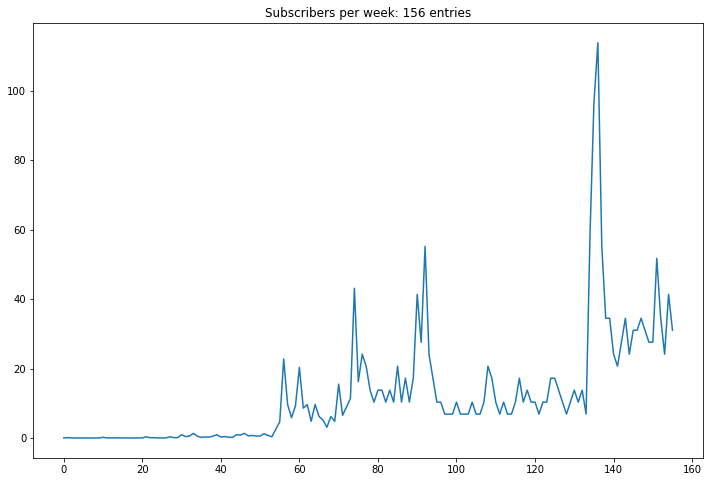

In [4]:
# Plot Subs per Week graph

plt.figure(figsize=(12,8))
df_subs['y'].plot()
plt.title(f'Subscribers per week: {len(df_subs)} entries')
plt.show();

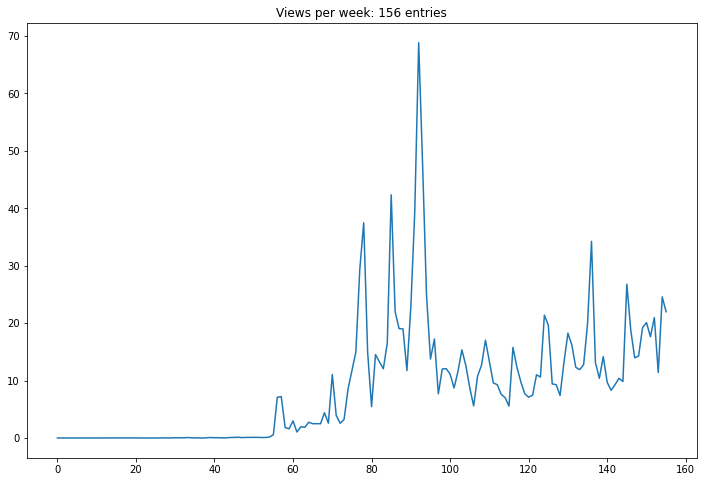

In [5]:
# Plot Views per Week graph

plt.figure(figsize=(12,8))
df_views['y'].plot()
plt.title(f'Views per week: {len(df_views)} entries')
plt.show();

# Correct y_values

In [6]:
# Get channel real stats
import requests
import time

# Specify the path to your .txt file
api_path = "./keys/api_key_youtube.txt"

# Open the file in read mode
with open(api_path, 'r') as file:
    # Read the contents of the file
    api_content = file.read()

# Your YouTube API key
API_KEY = str(api_content)

# Channel ID or Username
CHANNEL_ID = 'UCmCg86gXHnROv4ZIXbdGWlg'  # Example: Google Developers channel ID

# Define the API endpoint and parameters
url = 'https://www.googleapis.com/youtube/v3/channels'
params = {
    'part': 'snippet,statistics',
    'id': CHANNEL_ID,
    'key': API_KEY
}

# Make the API request
response = requests.get(url, params=params)
data = response.json()

In [7]:
# Get real total values from the youtube channel
subs_total_real = int(data['items'][0]['statistics']['subscriberCount'])
views_total_real = int(data['items'][0]['statistics']['viewCount'])

# Get the highest value from the website
subs_sum = df_subs['y'].sum()
views_sum = df_views['y'].sum()

# Get percentage of each value respect to the total
df_subs['y'] = (df_subs['y'] / df_subs['y'].sum() * subs_total_real).round()
df_views['y'] = (df_views['y'] / df_views['y'].sum() * views_total_real).round()

# Multiply the y column by the factor to ge real values
# df_subs['y'] = (df_subs['y'] * subs_factor).round(-1)
# df_views['y'] = (df_views['y'] * views_factor).round()

# Get Weeks from x_values

In [8]:
# First week of graph

if len(df_subs) == len(df_views):
    n_weeks = len(df_subs)
    print('Dataframes contain same number of weeks -> OK')
else:
    print('Dataframes have different number of weeks -> NOT OK!!')

week_list = [n for n in range(1, len(df_subs) + 1)]

# Add the week numbering data to the dataframes
df_subs['week'] = pd.Series(week_list)
df_views['week'] = pd.Series(week_list)

df_views.head()

Dataframes contain same number of weeks -> OK


,x,y,week
0,7.941176,1305.0,1
1,12.336662,1431.0,2
2,17.464728,1265.0,3
3,22.592794,1230.0,4
4,27.720860,1155.0,5


# Merge Views and Subscribers dataframes

In [9]:
# Unify the dataframes into a single one

df = df_views.copy()
df['x'] = df_subs['y'].copy()
df.rename(columns={'x': 'subs', 'y': 'views'}, inplace=True)

df

,subs,views,week
0,6.0,1305.0,1
1,41.0,1431.0,2
2,17.0,1265.0,3
3,5.0,1230.0,4
4,8.0,1155.0,5
...,...,...,...
151,19039.0,3015585.0,152
152,12691.0,3585000.0,153
153,8883.0,1950579.0,154
154,15230.0,4201086.0,155


# Get start and end day of each week

In [10]:
from datetime import datetime, timedelta

# Create a DataFrame with your week data
weeks = df['week']

# Start date for week 1
start_date = pd.to_datetime('2021-08-09')

# Calculate the first day of each week
df['start_date'] = df.index.to_series().apply(lambda x: start_date + timedelta(weeks=x))

# Calculate the last day of each week (6 days after the first day)
df['end_date'] = df['start_date'] + timedelta(days=6)

# Transform to datetime data
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

In [11]:
# Add accumulative sum of views and subscribers
df['subs_cumsum'] = df['subs'].cumsum()
df['views_cumsum'] = df['views'].cumsum()

# Export data to csv

In [12]:
df.to_csv('./df_channel_stats.csv')